<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/GridSearchCVMixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [ ]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

## **Data Preparation**

In [ ]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [ ]:
grid_mixed = asd_2018_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_grid = grid_mixed.drop("ASD_Traits", axis=1)
y_grid = grid_mixed["ASD_Traits"]

X_grid_train, X_grid_test, y_grid_train, y_grid_test = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42, stratify=y_grid)


In [ ]:
y_grid_test.value_counts()

Yes    219
No      98
Name: ASD_Traits, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD','Sex']
target = ['ASD_Traits']

In [ ]:
X_grid_train[age] = scaler.fit_transform(X_grid_train[age].values.reshape(-1,1))
X_grid_test[age] = scaler.transform(X_grid_test[age].values.reshape(-1,1))
for c in char_vals:
  X_grid_train[c] = encoder.fit_transform(X_grid_train[c].values.reshape(-1,1))
  X_grid_test[c] = encoder.transform(X_grid_test[c].values.reshape(-1,1))
y_grid_train = y_encoder.fit_transform(y_grid_train.values.ravel())
y_grid_test = y_encoder.transform(y_grid_test.values.ravel())

In [ ]:
# YES is encoded to 1, NO = 0
print(y_grid_test)

[1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1]


In [ ]:
print(X_grid_train)

     A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Jaundice  \
710   1   0   0   1   0   0   1   0   0    0  0.625000  1.0       0.0   
567   1   1   0   0   1   0   0   1   0    1  1.000000  1.0       1.0   
594   0   1   1   1   1   1   1   1   1    0  1.000000  1.0       0.0   
46    0   0   0   0   0   0   0   0   0    1  0.250000  1.0       1.0   
663   1   0   0   0   1   0   1   1   1    0  0.083333  1.0       1.0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...       ...   
660   1   1   1   1   1   1   1   0   1    1  0.416667  1.0       0.0   
846   0   0   0   0   0   0   1   0   0    1  0.375000  1.0       1.0   
658   0   0   1   1   0   1   1   1   1    1  0.916667  1.0       1.0   
529   1   1   0   1   1   1   1   1   1    0  0.208333  1.0       0.0   
551   0   0   1   0   0   1   0   0   0    1  0.000000  0.0       0.0   

     Family_mem_with_ASD  
710                  0.0  
567                  0.0  
594                  0.0  
46             

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_grid_train, y_grid_train)

LogisticRegression(random_state=42)

In [ ]:
param_grid = {
    'C'       : np.logspace(-3,3,7),
}

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='binary', pos_label=1),
          'recall': make_scorer(recall_score,average='binary',pos_label=1),
          'f1_score': make_scorer(f1_score,average='binary',pos_label=1)}

In [ ]:
from sklearn.model_selection import GridSearchCV

log_grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, scoring = metrics, refit='accuracy')

In [ ]:
log_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [ ]:
best_est = log_grid.best_estimator_

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def show_grid_cv_results(model,predictors, target):
  accuracy = model.cv_results_['mean_test_accuracy']
  precision = model.cv_results_['mean_test_precision']
  recall = model.cv_results_['mean_test_recall']
  f1 = model.cv_results_['mean_test_f1_score']

  print("Best parameters: {}".format(model.best_params_))
  print("Best score: {:.2f}".format(model.best_score_))
  print("Accuracy: ", accuracy.mean())
  print("Precision: ", precision.mean())
  print("Recall: ", recall.mean())
  print("F1 Score: ", f1.mean())

  ConfusionMatrixDisplay.from_estimator(model,predictors,target)

In [ ]:
def final_evaluation(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision[YES]: ", precision_score(target, predictions, average='binary', pos_label=1))
  print("Recall[YES]: ", recall_score(target, predictions,average='binary', pos_label=1))
  print("F1[YES]: ", f1_score(target, predictions,average='binary', pos_label=1))

  ConfusionMatrixDisplay.from_estimator(model, predictors, target)
  # ConfusionMatrixDisplay.from_predictions(target,predictions)

Best parameters: {'C': 1.0}
Best score: 1.00
Accuracy:  0.9387466183384551
Precision:  0.9340732898602218
Recall:  1.0
F1 Score:  0.9623024247318854


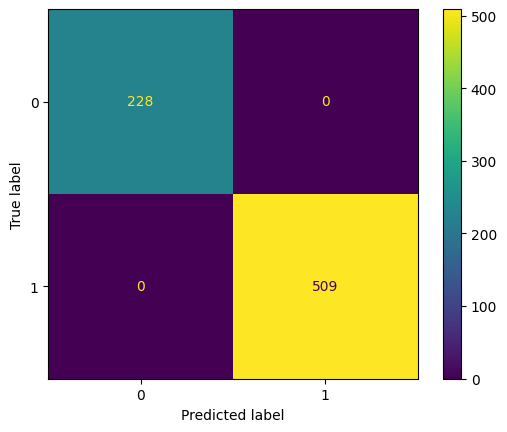

In [ ]:
show_grid_cv_results(log_grid, X_grid_train, y_grid_train)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


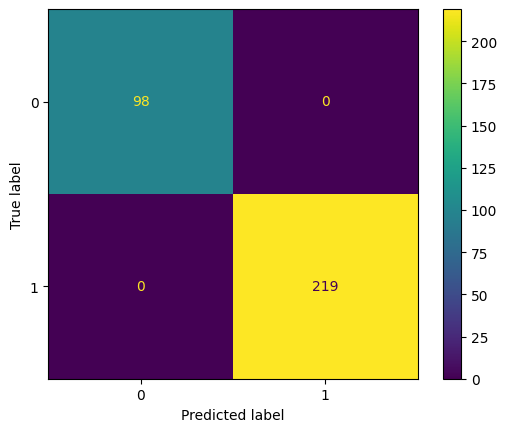

In [ ]:
final_evaluation(log_grid, X_grid_test, y_grid_test)

**No fine tuning**

In [ ]:
new_logr = LogisticRegression(random_state=42)
new_logr.fit(X_grid_train, y_grid_train)

LogisticRegression(random_state=42)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


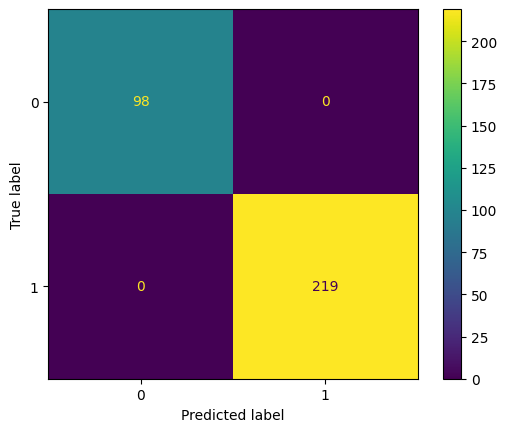

In [ ]:
final_evaluation(new_logr, X_grid_test, y_grid_test)

### **Feature importance**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [ ]:
best = SelectKBest(chi2, k='all')

X_train_best = best.fit_transform(X_grid_train,y_grid_train)
X_test_best = best.transform(X_grid_test)

bestLR = LogisticRegression()
bestLR.fit(X_train_best,y_grid_train)

LogisticRegression()

**Chi squared**

In [ ]:
# Get the chi2 scores and names for each feature
chi2_scores = best.scores_
feature_names = np.array(X_grid_train.columns)
selected_mask = best.get_support()

sorted_indices = chi2_scores.argsort()[::-1]
sorted_scores = chi2_scores[sorted_indices]
sorted_features = feature_names[selected_mask][sorted_indices]

# Print the feature names and their corresponding chi2 scores
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score:.3f}")

A9: 120.305
A5: 110.988
A6: 93.776
A2: 90.845
A4: 88.065
A1: 79.680
A3: 79.174
A7: 74.220
A8: 69.752
A10: 9.392
Jaundice: 4.988
Sex: 3.507
Age_Mons: 0.468
Family_mem_with_ASD: 0.010


**Information gain**

In [ ]:
new_info_scores = mutual_info_classif(X_grid_train, y_grid_train, random_state=42)

sorted_info_gain = sorted(zip(new_info_scores, feature_names), reverse=True)

print("{:<20} {:<10}".format('Feature', 'Importance'))
print("----------------------------------------")
for coef, feat in sorted_info_gain:
    print("{:<20} {:.4f}".format(feat, abs(coef)))

Feature              Importance
----------------------------------------
A9                   0.1899
A5                   0.1781
A7                   0.1698
A6                   0.1609
A1                   0.1390
A4                   0.1389
A2                   0.1281
A3                   0.0953
A8                   0.0760
Sex                  0.0552
A10                  0.0343
Jaundice             0.0171
Age_Mons             0.0130
Family_mem_with_ASD  0.0109


**Feature Coefficients**

In [ ]:
coefs = best_est.coef_
sorted_importance = sorted(zip(coefs[0], feature_names), reverse=True)

print("{:<20} {:<10}".format('Feature', 'Importance'))
print("----------------------------------------")
for coef, feat in sorted_importance:
    print("{:<20} {:.4f}".format(feat, abs(coef)))

Feature              Importance
----------------------------------------
A2                   2.6939
A9                   2.6171
A8                   2.4688
A5                   2.3673
A6                   2.3666
A7                   2.3641
A4                   2.2480
A10                  2.2256
A1                   2.1064
A3                   2.0345
Jaundice             0.6345
Sex                  0.2764
Age_Mons             0.1850
Family_mem_with_ASD  0.1295


## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42) 
ada.fit(X_grid_train, y_grid_train)

AdaBoostClassifier(random_state=42)

In [ ]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [ ]:
ada_grid = GridSearchCV(ada, param_grid=ada_param_grid, cv=5, scoring=metrics, refit='accuracy')

In [ ]:
ada_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best score: 1.00
Accuracy:  0.9514637086065656
Precision:  0.9512702322332588
Recall:  0.9827282728272828
F1 Score:  0.9662478223087351


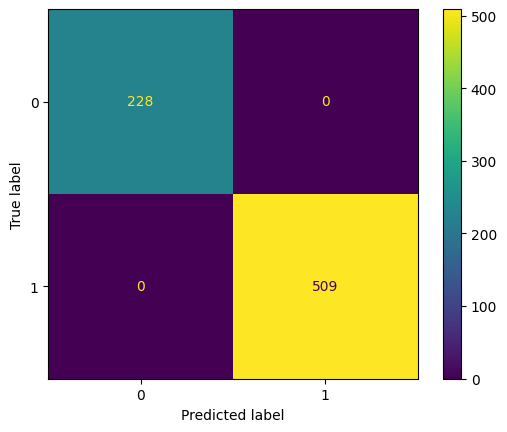

In [ ]:
show_grid_cv_results(ada_grid, X_grid_train, y_grid_train)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


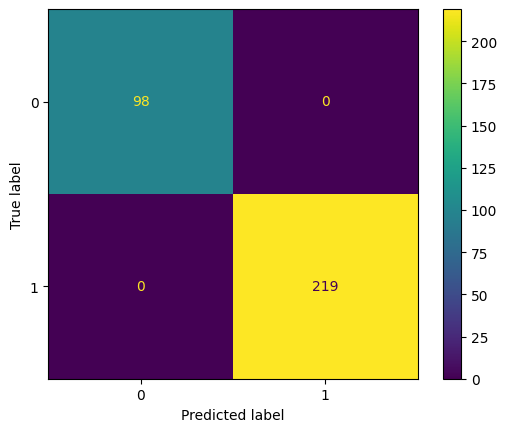

In [ ]:
final_evaluation(ada_grid, X_grid_test, y_grid_test)

In [ ]:
ada_best = ada_grid.best_estimator_
ada_best

AdaBoostClassifier(random_state=42)

In [ ]:
ada_best.learning_rate

1.0

In [ ]:
ada_best.n_estimators

50

In [ ]:
new_ada = AdaBoostClassifier(random_state=42)
new_ada.fit(X_grid_train, y_grid_train)

AdaBoostClassifier(random_state=42)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


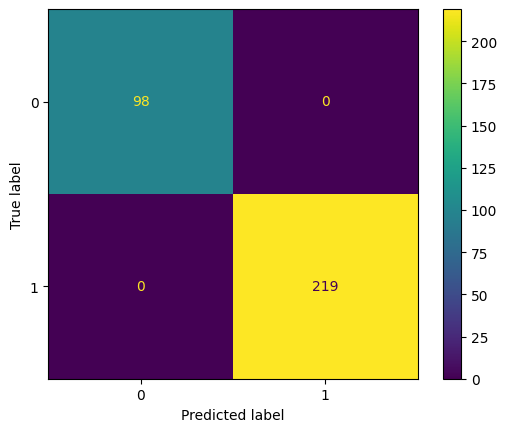

In [ ]:
final_evaluation(new_ada, X_grid_test, y_grid_test)

**Feature importance**

In [ ]:
from sklearn.inspection import permutation_importance

ada_perm = permutation_importance(ada_grid, X_grid_test, y_grid_test, n_repeats=10, random_state=0)
ada_importances = ada_perm.importances_mean

for feature_name, importance in sorted(zip(feature_names, ada_importances)):
    print(f"{feature_name}: {importance:.4f}")

A1: 0.0476
A10: 0.0397
A2: 0.0505
A3: 0.0366
A4: 0.0486
A5: 0.0394
A6: 0.0483
A7: 0.0479
A8: 0.0476
A9: 0.0580
Age_Mons: 0.0000
Family_mem_with_ASD: 0.0000
Jaundice: 0.0000
Sex: 0.0000


## **SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=42)

In [ ]:
svc_param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, cv=5, scoring=metrics,refit='accuracy')

In [ ]:
svc_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

In [ ]:
best_svc = svc_grid.best_estimator_
best_svc

SVC(C=10, gamma=0.1, random_state=42)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 1.00
Accuracy:  0.8563976604155176
Precision:  0.8683826181266593
Recall:  0.9657712094738886
F1 Score:  0.9085574965643315


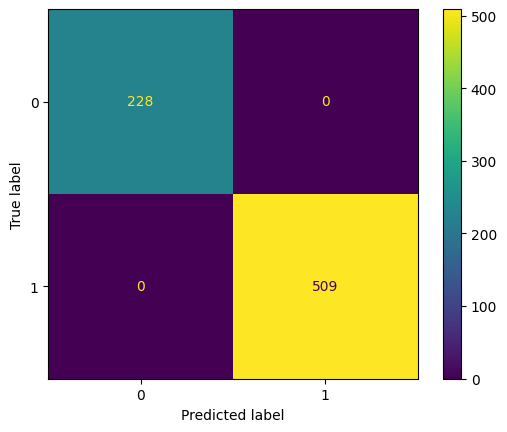

In [ ]:
show_grid_cv_results(svc_grid, X_grid_train, y_grid_train)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


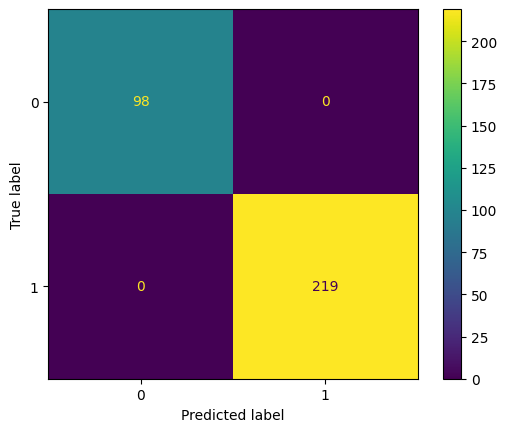

In [ ]:
final_evaluation(best_svc, X_grid_test, y_grid_test)

In [ ]:
svc_new = SVC(random_state=42, C=10, gamma=0.1)
svc_new.fit(X_grid_train, y_grid_train)

SVC(C=10, gamma=0.1, random_state=42)

Accuracy:  1.0
Precision[YES]:  1.0
Recall[YES]:  1.0
F1[YES]:  1.0


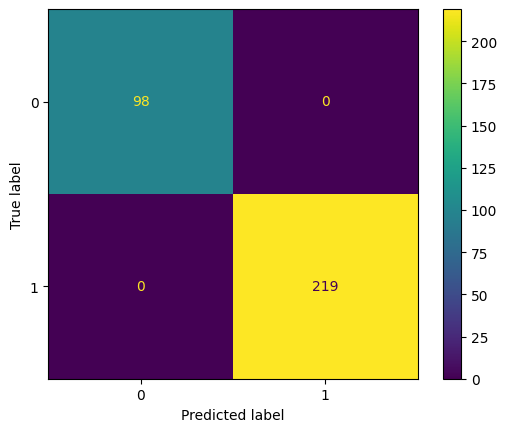

In [ ]:
final_evaluation(svc_new, X_grid_test, y_grid_test)

**No fine tuning**

In [ ]:
nf_svc = SVC(random_state=42)
nf_svc.fit(X_grid_train, y_grid_train)

SVC(random_state=42)

Accuracy:  0.9873817034700315
Precision[YES]:  0.9908675799086758
Recall[YES]:  0.9908675799086758
F1[YES]:  0.9908675799086758


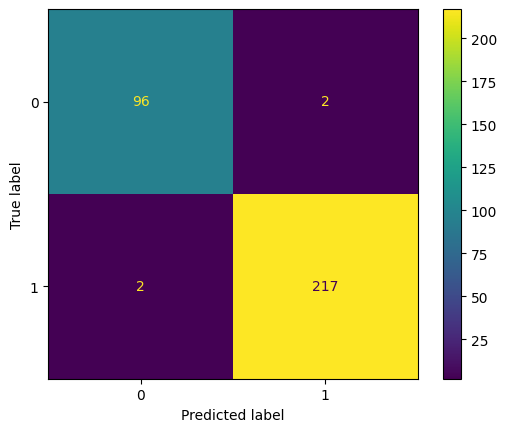

In [ ]:
final_evaluation(nf_svc, X_grid_test, y_grid_test)

**Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance

svc_perm = permutation_importance(svc_grid, X_grid_test, y_grid_test, n_repeats=10, random_state=0)
svc_importances = svc_perm.importances_mean

for feature_name, importance in sorted(zip(feature_names, svc_importances)):
    print(f"{feature_name}: {importance:.4f}")


A1: 0.0476
A10: 0.0397
A2: 0.0505
A3: 0.0366
A4: 0.0486
A5: 0.0394
A6: 0.0483
A7: 0.0479
A8: 0.0476
A9: 0.0580
Age_Mons: 0.0000
Family_mem_with_ASD: 0.0000
Jaundice: 0.0000
Sex: 0.0000


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion' : ['gini','entropy','log_loss'], #Function applied for measuring quality of a split
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [ ]:
rf_grid  = GridSearchCV(rf, rf_param_grid, cv=5,scoring=metrics,refit='accuracy')
rf_grid.fit(X_grid_train,y_grid_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.96
Accuracy:  0.9533218025281517
Precision:  0.9544747041783759
Recall:  0.979226935039183
F1 Score:  0.9666222452835812


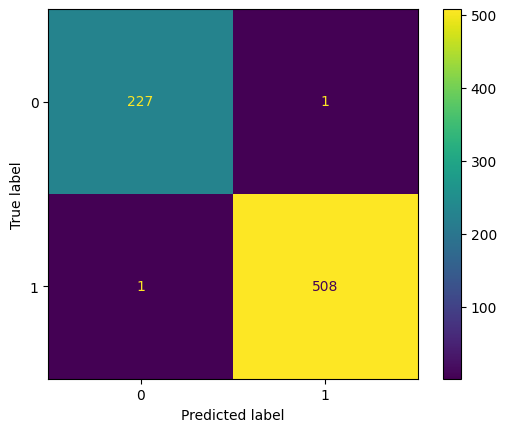

In [ ]:
show_grid_cv_results(rf_grid, X_grid_train, y_grid_train)

Accuracy:  0.9779179810725552
Precision[YES]:  0.9818181818181818
Recall[YES]:  0.9863013698630136
F1[YES]:  0.9840546697038723


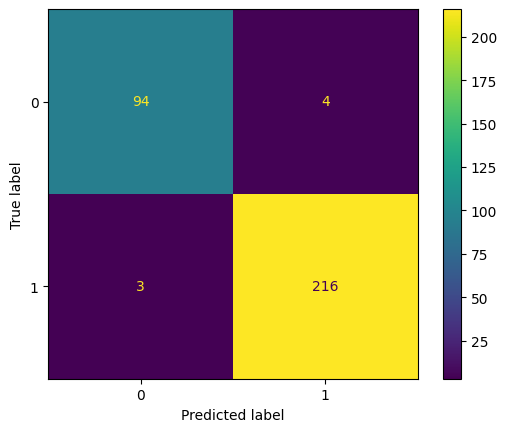

In [ ]:
final_evaluation(rf_grid, X_grid_test, y_grid_test)

**No fine tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

new_rf = RandomForestClassifier(random_state=42)

In [ ]:
new_rf.fit(X_grid_train, y_grid_train)

RandomForestClassifier(random_state=42)

Accuracy:  0.9716088328075709
Precision[YES]:  0.981651376146789
Recall[YES]:  0.9771689497716894
F1[YES]:  0.9794050343249427


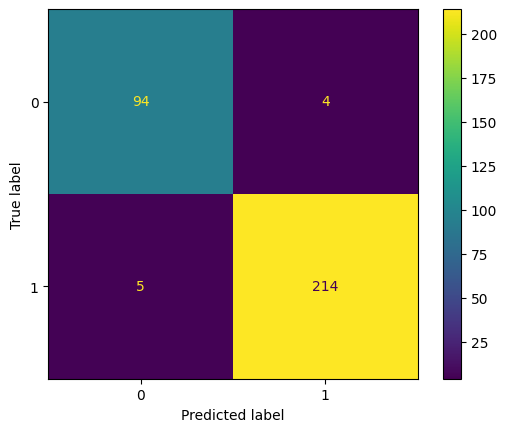

In [ ]:
final_evaluation(new_rf, X_grid_test, y_grid_test)

**Feature Importance**

In [ ]:
best_rf = rf_grid.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

In [ ]:
rf_importances = best_rf.feature_importances_

In [ ]:
rf_importance_df = pd.DataFrame({'feature': feature_names, 'importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values('importance', ascending=False)
print(rf_importance_df)

                feature  importance
8                    A9    0.141498
6                    A7    0.132871
4                    A5    0.121815
5                    A6    0.113527
0                    A1    0.091910
1                    A2    0.088822
3                    A4    0.078551
7                    A8    0.063289
2                    A3    0.054911
10             Age_Mons    0.045889
9                   A10    0.032369
12             Jaundice    0.014165
11                  Sex    0.012602
13  Family_mem_with_ASD    0.007780


**Permutation importance**

In [ ]:
rf_perm = permutation_importance(best_rf, X_grid_test, y_grid_test, n_repeats=10, random_state=0)
rf_importances = rf_perm.importances_mean

for feature_name, importance in sorted(zip(feature_names, rf_importances)):
    print(f"{feature_name}: {importance:.4f}")

A1: 0.0281
A10: 0.0132
A2: 0.0322
A3: 0.0312
A4: 0.0268
A5: 0.0208
A6: 0.0375
A7: 0.0486
A8: 0.0297
A9: 0.0634
Age_Mons: -0.0025
Family_mem_with_ASD: -0.0003
Jaundice: 0.0000
Sex: -0.0009


## **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # values to search for 'n_neighbors' hyperparameter
    'weights': ['uniform', 'distance'],  # values to search for 'weights' hyperparameter
    'algorithm': ['auto','ball_tree','kd_tree','brute'], #Algorithm used to compute the nearest neighbors
}

In [ ]:
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5,scoring=metrics, refit='accuracy')
knn_grid.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=binary, pos_label=1),
                      'precision': make_scorer(precision_score, average=binary, pos_label=1),
                      'recall': make_scorer(recall_score, average=binary, pos_label=1)})

Best parameters: {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.95
Accuracy:  0.9377179475393761
Precision:  0.973496689540533
Recall:  0.9354842101857243
F1 Score:  0.9537304670519825


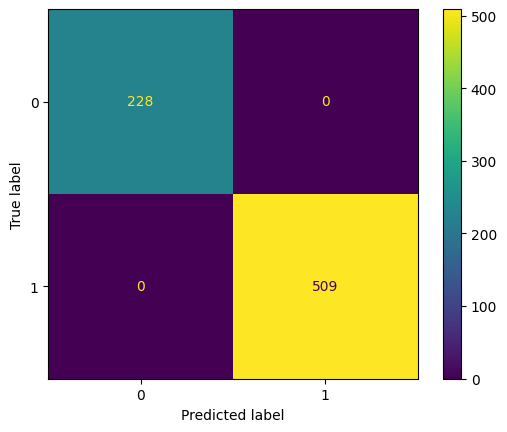

In [ ]:
show_grid_cv_results(knn_grid, X_grid_train, y_grid_train)

Accuracy:  0.9621451104100947
Precision[YES]:  0.9813953488372092
Recall[YES]:  0.9634703196347032
F1[YES]:  0.9723502304147464


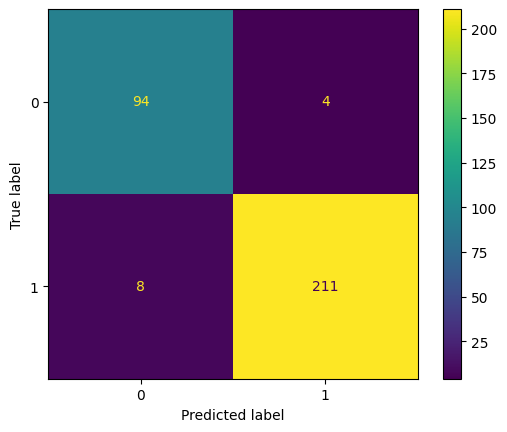

In [ ]:
final_evaluation(knn_grid, X_grid_test, y_grid_test)

**No fine tuning**

In [ ]:
new_knn = KNeighborsClassifier()

In [ ]:
new_knn.fit(X_grid_train, y_grid_train)

KNeighborsClassifier()

Accuracy:  0.9589905362776026
Precision[YES]:  0.9904761904761905
Recall[YES]:  0.9497716894977168
F1[YES]:  0.9696969696969697


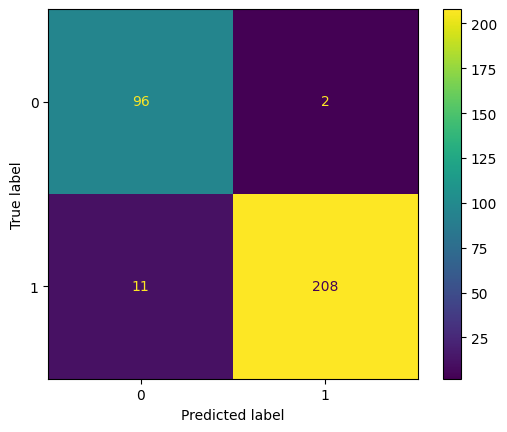

In [ ]:
final_evaluation(new_knn, X_grid_test, y_grid_test)

**Feature importance**

In [ ]:
knn_perm = permutation_importance(knn_grid, X_grid_test, y_grid_test, n_repeats=10, random_state=0)
knn_importances = knn_perm.importances_mean

for feature_name, importance in sorted(zip(feature_names, knn_importances)):
    print(f"{feature_name}: {importance:.4f}")

A1: 0.0322
A10: 0.0196
A2: 0.0281
A3: 0.0139
A4: 0.0164
A5: 0.0196
A6: 0.0315
A7: 0.0281
A8: 0.0297
A9: 0.0388
Age_Mons: -0.0050
Family_mem_with_ASD: 0.0000
Jaundice: -0.0025
Sex: 0.0085
